# Key-word Extraction

Load dataset and take a small sample

In [43]:
import pandas as pd
movies_metadata = pd.read_csv('data/movies_metadata.csv', index_col='id', low_memory=False)
movies_metadata.sample(100)
movies_metadata.dropna(subset='overview', inplace=True)

In [44]:
import spacy

entities = []
nlp = spacy.load('en_core_web_sm')

for var in movies_metadata['overview'].iloc[65:115]:
    #Create a Doc object
    doc = nlp(var)
    words = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct]  
    # Generate list of tokens
    entities+=words
print(entities)

['hot', 'summer', 'day', '1933', 'south', 'philly', '12', 'year', 'old', 'gennaro', 'lives', 'widowed', 'mom', 'ailing', 'grandpa', 'sits', 'outside', 'holding', 'tight', 'quarter', 'promised', 'gennaro', 'gennaro', 'like', 'buy', 'ticket', 'plush', 'new', 'movie', 'theater', 'grandpa', 'ready', 'pass', 'quarter', 'pass', 'final', 'reward', 'unfinished', 'business', 'woman', 'past', 'enlists', 'gennaro', 'act', 'emissary', 'learning', 'husband', 'infidelities', 'housewife', 'invites', 'itinerant', 'lesbian', 'lives', 'craig', 'smokey', 'guys', 'los', 'angeles', 'hanging', 'porch', 'friday', 'afternoon', 'smoking', 'drinking', 'looking', 'seth', 'gecko', 'younger', 'brother', 'richard', 'run', 'bloody', 'bank', 'robbery', 'texas', 'escape', 'border', 'mexico', 'home', 'free', 'morning', 'pay', 'local', 'kingpin', 'survive', 'dusk', 'till', 'dawn', 'rendezvous', 'point', 'turns', 'hell', 'strip', 'joint', 'max', 'kirkpatrick', 'cop', 'protects', 'kate', 'mcquean', 'civil', 'law', 'attorn

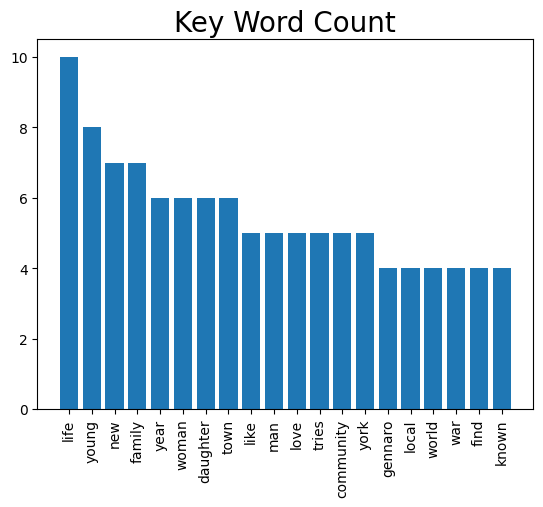

In [45]:
from collections import Counter
from matplotlib import pyplot as plt

corpus = []
for disclosures in entities:
    for word in disclosures.split():
        corpus.append(word)
# Plot a bar chart of the most common 20 words        
common_words = pd.DataFrame(Counter(corpus).most_common(20))
common_words.columns = ('Word', 'Count')

plt.bar(x= common_words['Word'], height=common_words['Count'])
plt.xticks(rotation='vertical')
plt.title("Key Word Count", fontsize = 20)
plt.show()

# Compare results without taking a sample

Time it takes to run code with sklearn TfidfVectorizer 485.50


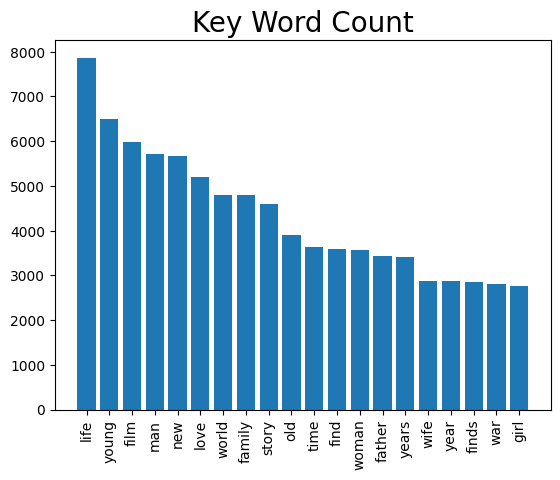

In [47]:
import time
start = time.time()
entities = []
nlp = spacy.load('en_core_web_sm')

for var in movies_metadata['overview']:
    #Create a Doc object
    doc = nlp(var)
    words = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct]  
    # Generate list of tokens
    entities+=words
corpus = []
for disclosures in entities:
    for word in disclosures.split():
        corpus.append(word)
# Plot a bar chart of the most common 20 words        
common_words = pd.DataFrame(Counter(corpus).most_common(20))
common_words.columns = ('Word', 'Count')

end = time.time()
print('Time it takes to run code with sklearn TfidfVectorizer', format((end - start),'.2f'))

plt.bar(x= common_words['Word'], height=common_words['Count'])
plt.xticks(rotation='vertical')
plt.title("Key Word Count", fontsize = 20)
plt.show()


# Get key-words with TfidfVectorizer

Time it takes to run code with sklearn TfidfVectorizer 0.47


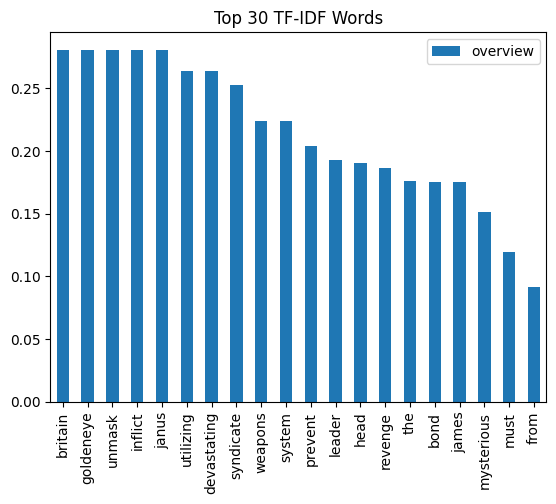

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

start1 = time.time()
# Instantiate
movies_metadata = movies_metadata.dropna()

vectorizer = TfidfVectorizer()
# Fit the data
tfidf = vectorizer.fit_transform(movies_metadata['overview'])
# Create a dataframe of TFIDF
tfidf_df = pd.DataFrame(tfidf[0].T.todense(), 
                      index=vectorizer.get_feature_names_out(), 
                      columns=["overview"])
# Sort
tfidf_df = tfidf_df.sort_values('overview', ascending=False)

end1 = time.time()
print('Time it takes to run code with sklearn TfidfVectorizer', format((end1 - start1),'.2f'))
# Bar Plot
tfidf_df[:20].plot.bar(title="Top 30 TF-IDF Words")
plt.show()

# Conclusion
One can see that by using different techniques one can receive different outcome.</br>
The time it takes to compute most common words with sklearn TfidfVectorizer is much shorter.